In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

# Prediction Visualizations (Enrich vs Burnup)

## Low burnup data set

In [23]:
low_burn = pd.read_csv('../results/2jul2018/trainset_1_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
low_enri = pd.read_csv('../results/2jul2018/trainset_1_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
low_cool = pd.read_csv('../results/2jul2018/trainset_1_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

low_enri.sample()


,Instance,TrueY,kNN,Ridge,SVR
1630,2.566e+02,4.25,4.217462,4.086063,4.32005


In [24]:
rr = 'Ridge'
svr = 'SVR'
Y = 'TrueY'
knn = 'kNN'

In [25]:
low_burn = low_burn[[knn, rr, svr, Y]]//1000
low_cool = low_cool[[knn, rr, svr, Y]]//30
low_enri = low_enri[[knn, rr, svr, Y]]
low_x = low_burn[[Y]]
low_y = low_enri[[Y]]

In [26]:

low_cool.max()


kNN      12.0
Ridge    14.0
SVR      13.0
TrueY    12.0
dtype: float64

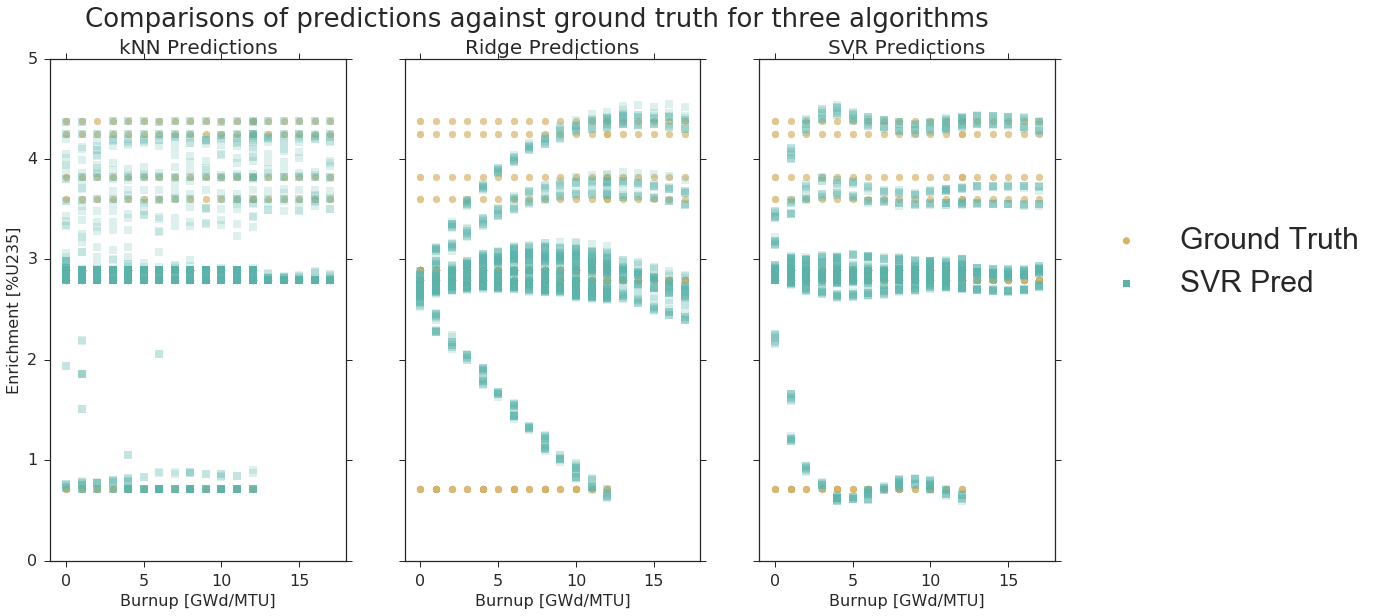

In [27]:
fig.clf()

fig, (ax_knn, ax_rr, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 9))
ax_knn.set_ylabel('Enrichment [%U235]', fontsize=16)
#plt.ylim(0, 6.2)

ax_knn.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_knn.set_xlim(-1, 18)
ax_knn.tick_params(labelsize=16)

ax_rr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_rr.set_xlim(-1, 18)
ax_rr.tick_params(labelsize=16)

ax_svr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_svr.set_xlim(-1, 18)
ax_svr.tick_params(labelsize=16)

# GROUND TRUTHS
ax_knn.scatter(low_x, low_y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')
ax_rr.scatter(low_x, low_y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')
ax_svr.scatter(low_x, low_y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')

# PREDICTIONS
ax_knn.scatter(low_burn[[knn]], low_enri[[knn]], c=colors['MTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='kNN Pred')
ax_rr.scatter(low_burn[[rr]], low_enri[[rr]], c=colors['MTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='Ridge Pred')
ax_svr.scatter(low_burn[[svr]], low_enri[[svr]], c=colors['MTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='SVR Pred')

ax_knn.set_title('kNN Predictions', fontsize=20)
ax_rr.set_title('Ridge Predictions', fontsize=20)
ax_svr.set_title('SVR Predictions', fontsize=20)
leg = plt.legend(loc=(1.1, 0.5))
for l in leg.legendHandles:
    l.set_alpha(1)
plt.suptitle('Comparisons of predictions against ground truth for three algorithms', fontsize=26)
fig.savefig('../results/2jul2018/graphs/1preds-versus-trueY.png', bbox_inches='tight', transparent=True)
plt.show()

## SFCOMPO data set

In [28]:
#trainXY = pd.read_pickle("../sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
# predictions
rxtr = pd.read_csv('../results/2jul2018/trainset_2_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('../results/2jul2018/trainset_2_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('../results/2jul2018/trainset_2_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('../results/2jul2018/trainset_2_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

knn = 'kNN'
rr = 'Ridge'
svr = 'SVR'
Y = 'TrueY'

In [29]:
burn = burn[[knn, rr, svr, Y]]//1000
cool = cool[[knn, rr, svr, Y]]//30
enri = enri[[knn, rr, svr, Y]]
x = burn[[Y]]
y = enri[[Y]]

In [30]:

enri.max()


kNN      5.000000
Ridge    6.126621
SVR      5.581795
TrueY    5.000000
dtype: float64

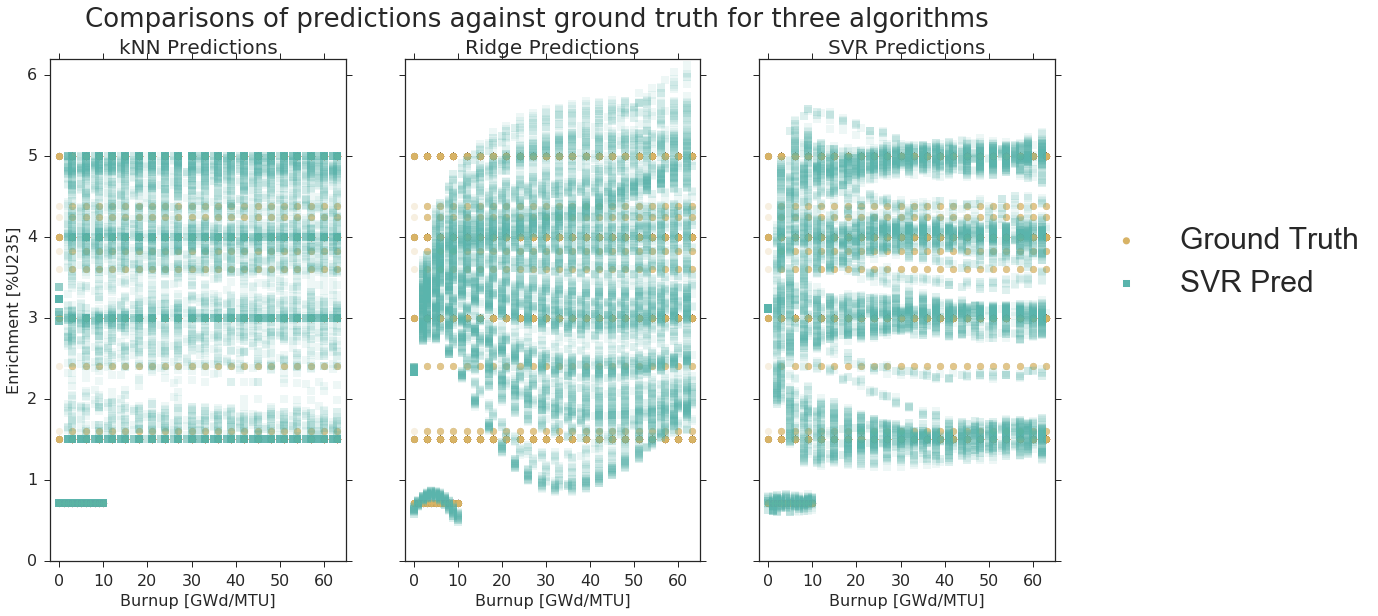

In [31]:
fig.clf()

fig, (ax_knn, ax_rr, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,9))
plt.xlim(-2, 65)
plt.ylim(0, 6.2)
ax_knn.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_rr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_svr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_knn.set_ylabel('Enrichment [%U235]', fontsize=16)

ax_knn.tick_params(labelsize=16)
ax_rr.tick_params(labelsize=16)
ax_svr.tick_params(labelsize=16)

# GROUND TRUTHS
ax_knn.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')
ax_rr.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')
ax_svr.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.2, linewidths=0.01, marker='o', label='Ground Truth')

# PREDICTIONS
ax_knn.scatter(burn[[knn]], enri[[knn]], c=colors['MTeal'], s=50, alpha=0.1, linewidths=0.01, marker='s', label='kNN Pred')
ax_rr.scatter(burn[[rr]], enri[[rr]], c=colors['MTeal'], s=50, alpha=0.1, linewidths=0.01, marker='s', label='Ridge Pred')
ax_svr.scatter(burn[[svr]], enri[[svr]], c=colors['MTeal'], s=50, alpha=0.1, linewidths=0.01, marker='s', label='SVR Pred')

ax_knn.set_title('kNN Predictions', fontsize=20)
ax_rr.set_title('Ridge Predictions', fontsize=20)
ax_svr.set_title('SVR Predictions', fontsize=20)
plt.suptitle('Comparisons of predictions against ground truth for three algorithms', fontsize=26)
leg = plt.legend(loc=(1.1, 0.5))
for l in leg.legendHandles:
    l.set_alpha(1)
fig.savefig('../results/2jul2018/graphs/2preds-versus-trueY.png', bbox_inches='tight', transparent=True)
plt.show()

# Prediction Visualization (vs Ground Truth)

## Low burnup data set

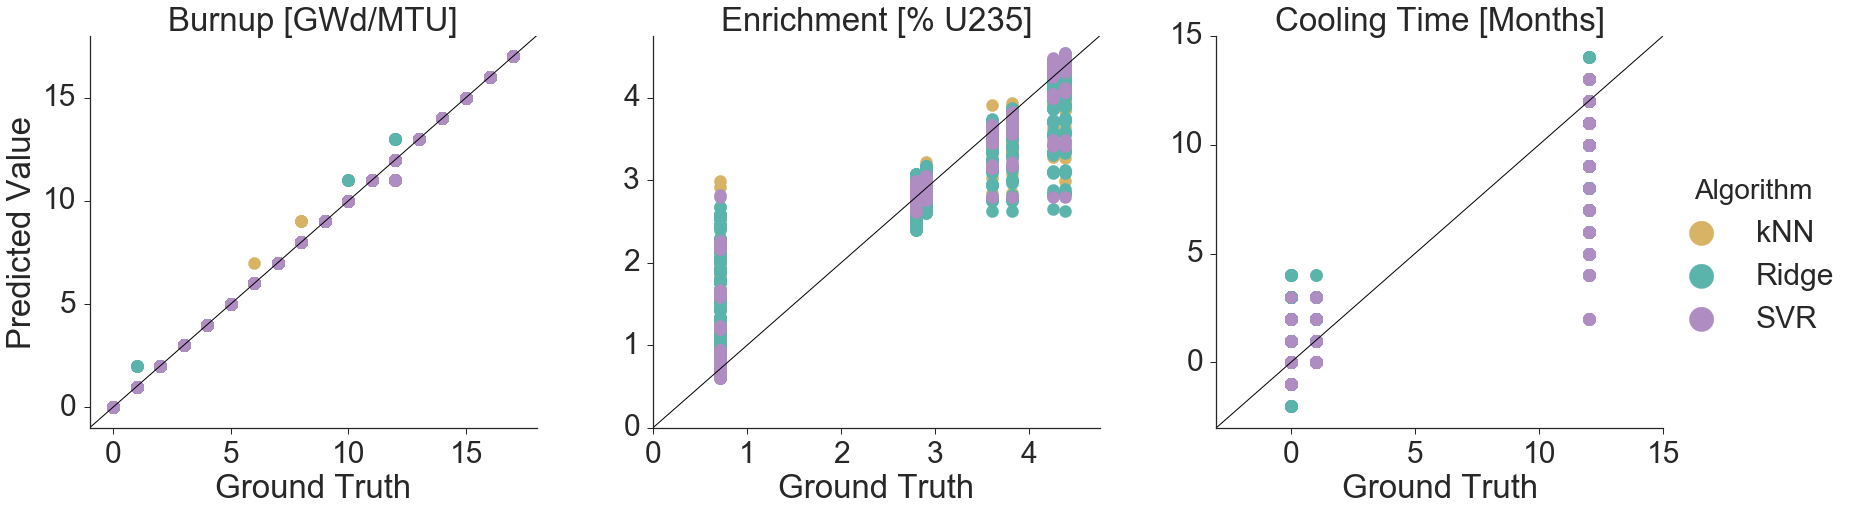

In [35]:
plt.clf()
sns.set(style="ticks", font_scale=3.0)

low_burn['Parameter'] = 'Burnup [GWd/MTU]'
low_enri['Parameter'] = 'Enrichment [% U235]'
low_cool['Parameter'] = 'Cooling Time [Months]'

pred_df = pd.DataFrame()
pred_df = pd.concat([low_burn, low_enri, low_cool])
pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
                       value_vars = ['kNN', 'Ridge', 'SVR'], 
                       value_name='Predicted Value', var_name='Algorithm')
pred = sns.FacetGrid(data=pred_df, col="Parameter",
                     hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
pred.axes[0,0].set_ylim(-1, 18)
pred.axes[0,0].set_xlim(-1, 18)
pred.axes[0,0].plot([-1, 18], [-1, 18], 'k-', linewidth=1)
pred.axes[0,1].set_ylim(0, 4.75)
pred.axes[0,1].set_xlim(0, 4.75)
pred.axes[0,1].plot([0, 4.75], [0, 4.75], 'k-', linewidth=1)
pred.axes[0,2].set_ylim(-3, 15)
pred.axes[0,2].set_xlim(-3, 15)
pred.axes[0,2].plot([-3, 15], [-3, 15], 'k-', linewidth=1)

pred.savefig('../results/2jul2018/graphs/1preds-versus-trueY-detailed.png', bbox_inches='tight', transparent=True)

## SFCOMPO data set

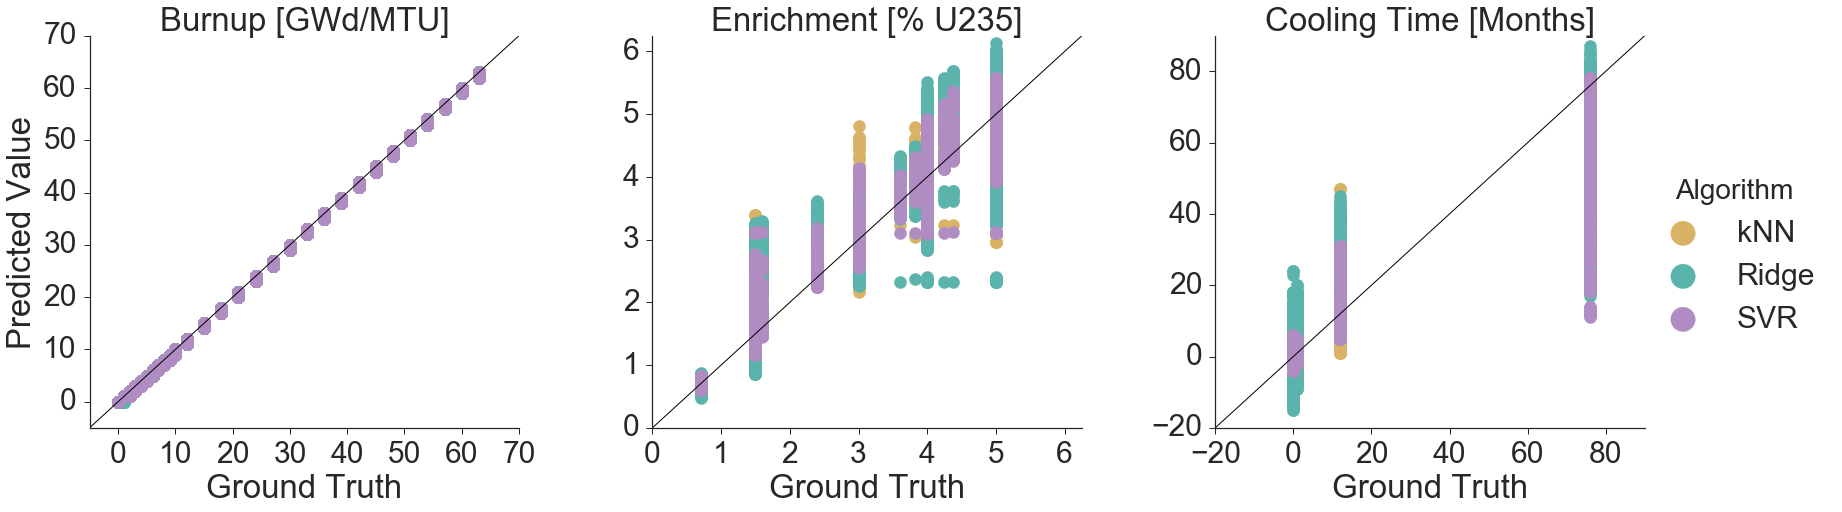

In [36]:
plt.clf()
sns.set(style="ticks", font_scale=3.0)

burn['Parameter'] = 'Burnup [GWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Months]'

pred_df = pd.DataFrame()
pred_df = pd.concat([burn, enri, cool])
pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
                       value_vars = ['kNN', 'Ridge', 'SVR'], 
                       value_name='Predicted Value', var_name='Algorithm')
pred = sns.FacetGrid(data=pred_df, col="Parameter",
                     hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
pred.axes[0,0].set_ylim(-5, 70)
pred.axes[0,0].set_xlim(-5, 70)
pred.axes[0,0].plot([-5, 70], [-5, 70], 'k-', linewidth=1)
pred.axes[0,1].set_ylim(0, 6.25)
pred.axes[0,1].set_xlim(0, 6.25)
pred.axes[0,1].plot([0, 6.25], [0, 6.25], 'k-', linewidth=1)
pred.axes[0,2].set_ylim(-20, 90)
pred.axes[0,2].set_xlim(-20, 90)
pred.axes[0,2].plot([-20, 90], [-20, 90], 'k-', linewidth=1)

pred.savefig('../results/2jul2018/graphs/2preds-versus-trueY-detailed.png', bbox_inches='tight', transparent=True)

# NOTES

for predictions in both training sets, burnup is good, and the others are bad

the validation and learning curves were (and thus alg hyperparams) were optimized for burnup only, need to do this separately for each prediction

may need to just run hyperparam optimization for each alg (knn, rr, svr) each time before prediction. 
Variables include: 
- trainset (1 or 2)
- nuclide subset (fiss, act, fissact, top_n)
- parameter being predicted (rxtr, burn, enri, cooling)
- scoring metric (exp var for diagnostic curves now, but also r2, RMSE, MAE)
